In [1]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install researchpy

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor
from warnings import filterwarnings
filterwarnings('ignore')
from datetime import datetime
import researchpy as rp
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# TOKYO OLİMPİYATLARI 2020

Tokyo Olimpiyatları 2020 veri setinde makine öğrenmesini yapma amacım tenis spor dalında  cinsiyet yaş verilerine göre madalya kazanma tahminini yaptırmaktır.

## 1. VERİYE İLK BAKIŞ

In [3]:
ad = pd.read_csv("tokyo.csv")
df = ad.copy()
df.shape

(275643, 10)

Tokyo Olimpiyatları 2020 veri setini okuttuk ve boyut bilgisini elde ettik.

In [4]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0


Veri setinin ilk 5 verisini ekrana bastırdık.

In [5]:
df.tail()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
275638,4522,ZURABIANI Zurab,Male,21.0,Georgia,2020 Summer,2020,Summer,Judo,0
275639,4523,ZURBRUGG Lindsey,Female,22.0,United States of America,2020 Summer,2020,Summer,Wheelchair Basketball,1
275640,4524,ZVINOWANDA Vimbai,Female,29.0,Zimbabwe,2020 Summer,2020,Summer,Athletics,0
275641,4525,ZWOUKHI Fathi,Male,34.0,Tunisia,2020 Summer,2020,Summer,Triathlon,0
275642,4526,ZYLKA Krzysztof,Male,41.0,Poland,2020 Summer,2020,Summer,Table Tennis,0


Veri setinin son 5 verisini ekrana bastırdık.

In [6]:
df=df.drop(["Unnamed: 0","Games","Year","Season"], axis = 1)
df.Sex[df.Sex=="Male"]="M"
df.Sex[df.Sex=="Female"]="F"
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,M,24.0,China,Basketball,0
1,A Lamusi,M,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,M,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,F,21.0,Netherlands,Speed Skating,0


Veri setinde cinsiyet kategorisinde F,M,Male,Female değişkenlerinin olduğunu gördük. Bu değişken sayısını 2'ye düşürdük.

In [7]:
df=df.drop_duplicates(subset=['Name'])

In [8]:
df.shape

(139157, 6)

## 2. Veri Setinin Betimlenmesi

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139157 entries, 0 to 275642
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    139157 non-null  object 
 1   Sex     139157 non-null  object 
 2   Age     132836 non-null  float64
 3   Team    139157 non-null  object 
 4   Sport   139157 non-null  object 
 5   Medal   139157 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


In [10]:
df.Team = pd.Categorical(df.Team)
df.Sport = pd.Categorical(df.Sport)

Kategori verilerini belirledik.

In [11]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["Sex"])
df["Sex"] = lbe.fit_transform(df["Sex"])
df.head()

,Name,Sex,Age,Team,Sport,Medal
0,A Dijiang,1,24.0,China,Basketball,0
1,A Lamusi,1,23.0,China,Judo,0
2,Gunnar Nielsen Aaby,1,24.0,Denmark,Football,0
3,Edgar Lindenau Aabye,1,34.0,Denmark/Sweden,Tug-Of-War,3
4,Christine Jacoba Aaftink,0,21.0,Netherlands,Speed Skating,0


Cinsiyet verilerini M=1 , F=0 dönüşümünü yaptık.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139157 entries, 0 to 275642
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Name    139157 non-null  object  
 1   Sex     139157 non-null  int32   
 2   Age     132836 non-null  float64 
 3   Team    139157 non-null  category
 4   Sport   139157 non-null  category
 5   Medal   139157 non-null  int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 5.2+ MB


In [13]:
rp.summary_cont(df[["Sex","Age","Medal"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Sex,139157.0,0.7439,0.4365,0.0012,0.7416,0.7462
1,Age,132836.0,24.6841,5.9765,0.0164,24.6520,24.7163
2,Medal,139157.0,0.2949,0.7747,0.0021,0.2908,0.2989


In [14]:
df.describe().T #eksik gözlemleri göz ardı eder ve kategorik değişkenleri görmezden gelir

,count,mean,std,min,25%,50%,75%,max
Sex,139157.0,0.743922,0.436467,0.0,0.0,1.0,1.0,1.0
Age,132836.0,24.684114,5.976451,10.0,21.0,24.0,27.0,97.0
Medal,139157.0,0.294868,0.774671,0.0,0.0,0.0,0.0,3.0


In [15]:
rp.summary_cat(df[["Sport","Team"]])[:30]

,Variable,Outcome,Count,Percent
0,Sport,Athletics,23025,16.55
1,,Swimming,9198,6.61
2,,Rowing,7726,5.55
3,,Football,6129,4.40
4,,Cycling,5765,4.14
5,,Boxing,5220,3.75
6,,Shooting,4969,3.57
7,,Wrestling,4937,3.55
8,,Sailing,4448,3.20
9,,Gymnastics,4083,2.93


In [16]:
tennisdf=df["Sport"] == "Tennis"
df=df[tennisdf]
df.head()

,Name,Sex,Age,Team,Sport,Medal
184,Enrique Abaroa Martnez,1,26.0,Mexico,Tennis,0
582,Abubakar Sadiq Abdullahi,1,28.0,Nigeria,Tennis,0
1235,Ricardo Augusto Amaral Acioly,1,24.0,Brazil,Tennis,0
1457,David Dixie Adams,1,30.0,South Africa,Tennis,0
1756,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),0,39.0,Sweden,Tennis,1


In [17]:
df.shape

(1237, 6)

## 3. Ayrık ve Eksik Değerlerin İncelenmesi

Ayrık değerlerin gözlemlenmesi


In [18]:
tf = df.select_dtypes(include = ['float64', 'int64'])
tf = tf.dropna()
tf.head()

,Age,Medal
184,26.0,0
582,28.0,0
1235,24.0,0
1457,30.0,0
1756,39.0,1


In [19]:
df_table = tf["Age"]
df_table.head()

184     26.0
582     28.0
1235    24.0
1457    30.0
1756    39.0
Name: Age, dtype: float64

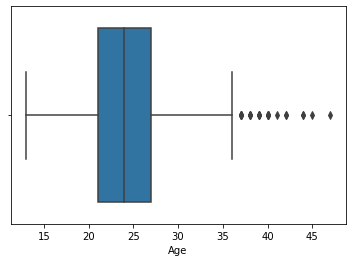

In [20]:
sns.boxplot(x =df_table);

In [21]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [22]:
print(Q1)
print(Q3)
print(IQR)

21.0
27.0
6.0


In [23]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [24]:
print(alt_sinir)
print(ust_sinir)

12.0
36.0


In [25]:
(df_table < alt_sinir) | ( df_table > ust_sinir)

184       False
582       False
1235      False
1457      False
1756       True
          ...  
270115    False
270519    False
270775    False
270973    False
270986    False
Name: Age, Length: 1167, dtype: bool

In [26]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
df_table[aykiri_tf]

1756      39.0
35408     39.0
37343     38.0
50452     39.0
50770     40.0
56699     37.0
60920     40.0
74352     40.0
80676     39.0
82333     40.0
92380     45.0
96061     44.0
103459    42.0
105045    44.0
133780    38.0
144339    40.0
155153    42.0
168721    47.0
188999    37.0
193026    40.0
201141    37.0
211230    38.0
220630    41.0
231796    37.0
253516    38.0
260416    37.0
261701    37.0
Name: Age, dtype: float64

Baskılama metodu yerine silme metodu kullandığım veri setine daha uygun olacağını düşündüğüm için bu yöntemi seçtim.
Baskılama metodu sonucunda değerlerim eşik değerine sabitleneceği için eşik değerinin üstü için doğru hesaplamaları yapamayacaktım.

In [27]:
df_table = pd.DataFrame(df_table)
df_table.shape

(1167, 1)

In [28]:
#aykırı olmayanları seçiyoruz
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]
t_df.shape

(1140, 1)

In [29]:
df_table[aykiri_tf].index

Int64Index([  1756,  35408,  37343,  50452,  50770,  56699,  60920,  74352,
             80676,  82333,  92380,  96061, 103459, 105045, 133780, 144339,
            155153, 168721, 188999, 193026, 201141, 211230, 220630, 231796,
            253516, 260416, 261701],
           dtype='int64')

In [30]:
df.shape

(1237, 6)

In [31]:
df.drop(df_table[aykiri_tf].index, axis=0, inplace=True)

In [32]:
df.shape

(1210, 6)

In [33]:
df[110:165]

,Name,Sex,Age,Team,Sport,Medal
25103,Kateryna Volodymyrivna Bondarenko,0,21.0,Ukraine,Tennis,0
25489,Kristie Boogert,0,26.0,Netherlands,Tennis,0
25589,Penelope Dora Harvey Boothby (-Geen),0,26.0,Great Britain,Tennis,2
25600,Rohan Bopanna,1,32.0,India-1,Tennis,0
26074,Jean Laurent Robert Borotra,1,25.0,France,Tennis,0
26508,Wollmar Filip Bostrm,1,29.0,Sweden,Tennis,0
26738,Oarda Bouchabou,0,18.0,Algeria,Tennis,0
26751,Eugenie Bouchard,0,22.0,Canada,Tennis,0
27019,"Cornelia ""Kea"" Bouman (-Tiedemann)",0,20.0,Netherlands,Tennis,0
27139,Yvonne Rene Suzanne Bourgeois (-Le Quellec),0,21.0,France-2,Tennis,0


Eksik Değerlerin Tespit edilmesi. Burada doğrudan silme yöntemini kullandık çünkü baskılama yöntemini kullansaydık üst yaşlardaki yarışmacıların madalya kazanma olasılığında veriler için doğru hesaplamalar yapılamayacaktı.

In [34]:
df.isnull().sum()

Name      0
Sex       0
Age      70
Team      0
Sport     0
Medal     0
dtype: int64

In [35]:
df.notnull().sum()

Name     1210
Sex      1210
Age      1140
Team     1210
Sport    1210
Medal    1210
dtype: int64

In [36]:
df.isnull()

,Name,Sex,Age,Team,Sport,Medal
184,False,False,False,False,False,False
582,False,False,False,False,False,False
1235,False,False,False,False,False,False
1457,False,False,False,False,False,False
1924,False,False,False,False,False,False
...,...,...,...,...,...,...
270115,False,False,False,False,False,False
270519,False,False,False,False,False,False
270775,False,False,False,False,False,False
270973,False,False,False,False,False,False


In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().values.any()

False

## 4. Kategorik Değişken Özetleri

In [39]:
katdf = df.select_dtypes(include = ["category"])

In [40]:
katdf.head()

,Team,Sport
184,Mexico,Tennis
582,Nigeria,Tennis
1235,Brazil,Tennis
1457,South Africa,Tennis
1924,Switzerland,Tennis


In [41]:
df["Sex"].value_counts()

1    680
0    460
Name: Sex, dtype: int64

<AxesSubplot:>

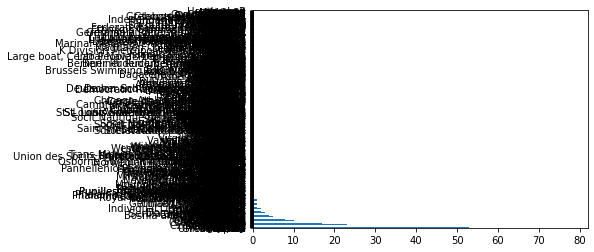

In [42]:
df["Team"].value_counts().plot.barh()

<AxesSubplot:xlabel='Sex'>

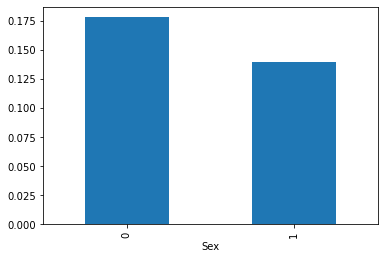

In [43]:
df[["Medal","Sex"]].groupby("Sex")["Medal"].mean().plot(kind="bar")

# Makine Öğrenmesi

## 1. Doğrusal Regresyon

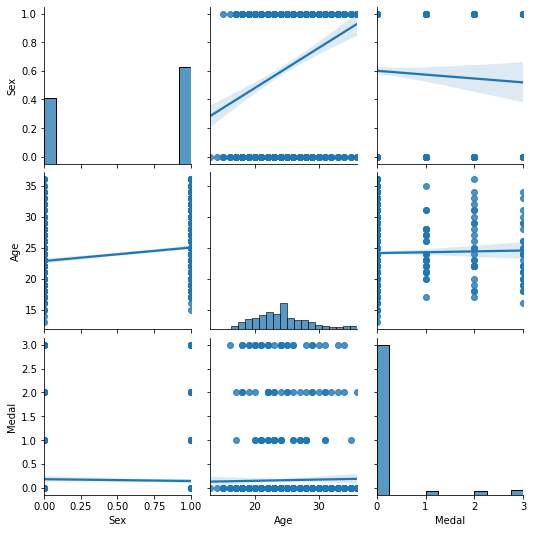

In [44]:
sns.pairplot(df, kind  ="reg")

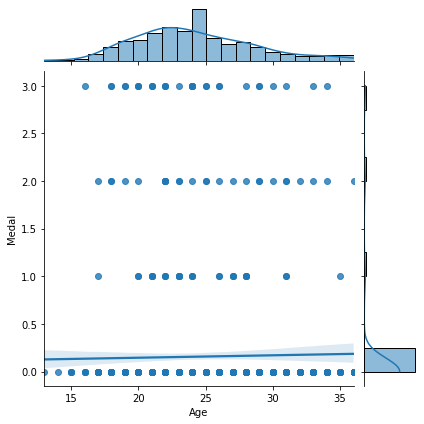

In [45]:
sns.jointplot(x = "Age", y = "Medal", data = df, kind = "reg")

In [46]:
X = df[["Age"]]
y = df["Medal"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.09362607949625924
[0.00255402]


In [47]:
model.score(X,y)

0.0003566938587388213

In [48]:
model.predict(X)[12:25]

array([0.17024676, 0.13959849, 0.15747664, 0.14981458, 0.17024676,
       0.15492262, 0.13959849, 0.15492262, 0.18557089, 0.18046285,
       0.13449044, 0.14981458, 0.15492262])

In [49]:
y[0:10]

184     0
582     0
1235    0
1457    0
1924    0
2031    3
2055    0
2749    2
3873    0
3995    1
Name: Medal, dtype: int64

In [50]:
(0.09)+(25*0.00255)

0.15375

In [51]:
model.predict([[25]])

array([0.15747664])

In [52]:
yeni_veri = [[5],[18],[22]]
model.predict(yeni_veri)

array([0.10639619, 0.13959849, 0.14981458])

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

lm = smf.ols("Medal ~ Age", df)
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse

0.3415609493192776

In [54]:
rmse = np.sqrt(mse)
rmse

0.5844321597236737

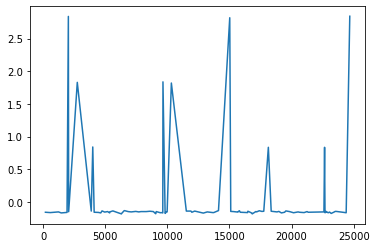

In [55]:
plt.plot(model.resid[:100])

### 1.2. Çoklu Doğrusal Regresyon

In [56]:
df.head()

,Name,Sex,Age,Team,Sport,Medal
184,Enrique Abaroa Martnez,1,26.0,Mexico,Tennis,0
582,Abubakar Sadiq Abdullahi,1,28.0,Nigeria,Tennis,0
1235,Ricardo Augusto Amaral Acioly,1,24.0,Brazil,Tennis,0
1457,David Dixie Adams,1,30.0,South Africa,Tennis,0
1924,Frdric Charles Aeschlimann,1,27.0,Switzerland,Tennis,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 184 to 270986
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    1140 non-null   object  
 1   Sex     1140 non-null   int32   
 2   Age     1140 non-null   float64 
 3   Team    1140 non-null   category
 4   Sport   1140 non-null   category
 5   Medal   1140 non-null   int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 86.4+ KB


In [58]:
df.head()

,Name,Sex,Age,Team,Sport,Medal
184,Enrique Abaroa Martnez,1,26.0,Mexico,Tennis,0
582,Abubakar Sadiq Abdullahi,1,28.0,Nigeria,Tennis,0
1235,Ricardo Augusto Amaral Acioly,1,24.0,Brazil,Tennis,0
1457,David Dixie Adams,1,30.0,South Africa,Tennis,0
1924,Frdric Charles Aeschlimann,1,27.0,Switzerland,Tennis,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 184 to 270986
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    1140 non-null   object  
 1   Sex     1140 non-null   int32   
 2   Age     1140 non-null   float64 
 3   Team    1140 non-null   category
 4   Sport   1140 non-null   category
 5   Medal   1140 non-null   int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 86.4+ KB


In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(912, 2)
(912,)
(228, 2)
(228,)


In [61]:
#verisetinin bütününün kopyası
training = df.copy()
training.shape

(1140, 6)

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

0.07063342969218618
[-0.05152385  0.00471665]


Tahmin

In [63]:
yeni_veri = [[1], [25]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1
0,1,25


In [64]:
model.predict(yeni_veri)

array([0.13702573])

In [65]:
yeni_veri2 = [[0], [25]]
yeni_veri2 = pd.DataFrame(yeni_veri2).T
yeni_veri2

,0,1
0,0,25


In [66]:
model.predict(yeni_veri2)

array([0.18854959])

In [67]:
from sklearn.metrics import mean_squared_error
#eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

0.5847033991788866

In [68]:
#test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

0.581277429962973

Model Tuning / Model Doğrulama

In [69]:
df.head()

,Name,Sex,Age,Team,Sport,Medal
184,Enrique Abaroa Martnez,1,26.0,Mexico,Tennis,0
582,Abubakar Sadiq Abdullahi,1,28.0,Nigeria,Tennis,0
1235,Ricardo Augusto Amaral Acioly,1,24.0,Brazil,Tennis,0
1457,David Dixie Adams,1,30.0,South Africa,Tennis,0
1924,Frdric Charles Aeschlimann,1,27.0,Switzerland,Tennis,0


In [70]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(912, 2)
(912,)
(228, 2)
(228,)


In [71]:
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rmseTest)
model.score(X_train, y_train)

0.5847033991788866
0.581277429962973


0.0022910609358485212

In [72]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

-0.03336258268402496

In [73]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz 
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

0.57195393376663
0.5327613713260921


rmseTrain = 0.57195393376663 / 
rmseTest = 0.5327613713260921

### 1.3. PCR (Temel Bileşen Regresyonu - Principal Component Regression)

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (855, 2)
y_train (855,)
X_test (285, 2)
y_test (285,)
training (1140, 6)


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[ 0.55894223, -0.59575831]])

In [76]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %58,75ini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %100ünü ifade ettiğini belirtir.

array([ 62.95, 100.  ])

In [77]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

0.15555555555555556
[0.00157073 0.03365316]


Tahmin

In [78]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([0.13638436, 0.13066905, 0.14268423, 0.14781496, 0.19412195])

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

0.5879799347067083

In [80]:
df["Medal"].mean()

0.15526315789473685

In [81]:
r2_score(y_train, y_pred)

0.0024304387887209566

In [82]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5720339971193792

Model Tuning

In [83]:
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5720339971193792


In [84]:
lm = LinearRegression()
#15 bileşenle ile bir deneyelim
pcr_model = lm.fit(X_reduced_train[:,0:15], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:15])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5720339971193792


In [85]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz 
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,shuffle = True,random_state = 1)
lm = LinearRegression()
RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, X_reduced_train[:,:i], y_train.ravel(), cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

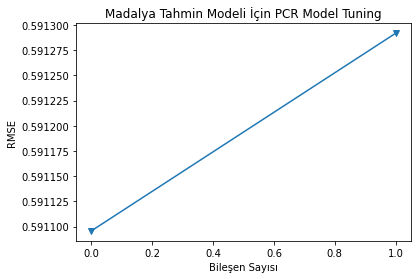

In [86]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Madalya Tahmin Modeli İçin PCR Model Tuning');

Grafikten de anlaşılacağı üzere bileşen sayısını 0 seçmek en düşük hataya erişmemizi sağlayacaktır.

In [87]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:1])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5886931261762727
0.5718008047761469


### 1.4. PLS (Kısmi En Küçük Kareler Regresyonu)

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [89]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi gene aynidir.
#pls_model = PLSRegression(n_components=3).fit(X_train, y_train)
pls_model.coef_

array([[-0.02269898],
       [ 0.02492163]])

In [90]:
X_train.head()

,Sex,Age
18824,1,24.0
159970,1,23.0
85568,0,17.0
184700,1,26.0
101250,0,26.0


In [91]:
pls_model.predict(X_train)

array([[0.13638436],
       [0.13066905],
       [0.14268423],
       [0.14781496],
       [0.19412195],
       [0.15411484],
       [0.14209966],
       [0.15353026],
       [0.15924557],
       [0.19353738],
       [0.19983726],
       [0.12495375],
       [0.20496799],
       [0.13638436],
       [0.15411484],
       [0.14209966],
       [0.11352314],
       [0.16496087],
       [0.14209966],
       [0.18840665],
       [0.12495375],
       [0.17067617],
       [0.12495375],
       [0.17697605],
       [0.13066905],
       [0.12495375],
       [0.14839953],
       [0.17067617],
       [0.12495375],
       [0.14839953],
       [0.10209254],
       [0.14781496],
       [0.13638436],
       [0.16554544],
       [0.16554544],
       [0.15983014],
       [0.11923845],
       [0.14839953],
       [0.14209966],
       [0.14781496],
       [0.11352314],
       [0.15353026],
       [0.14209966],
       [0.11923845],
       [0.13638436],
       [0.17639147],
       [0.10209254],
       [0.182

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.5879799347067083

In [93]:
r2_score(y_train, y_pred)

0.0024304387887210677

In [94]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.5721450462258648

Model Tuning

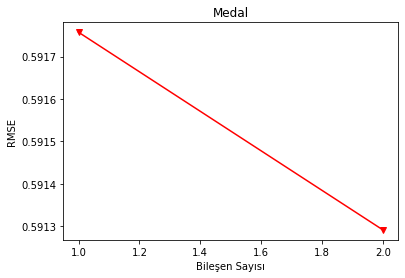

In [95]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Medal');

In [96]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [97]:
y_pred = pls_model.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5721450462258648

### 1.5. Ridge Regresyon

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [100]:
from sklearn.linear_model import Ridge
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [101]:
ridge_model.coef_

array([-0.04628273,  0.00571456])

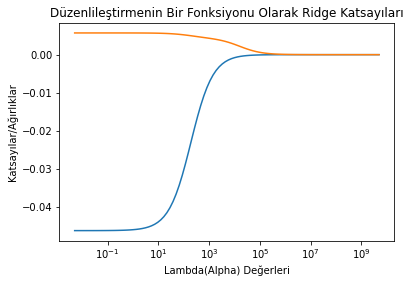

In [102]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

import matplotlib.pyplot as plt    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

Tahmin

In [103]:
y_pred = ridge_model.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

0.5721450467055695

Model Tuning

In [105]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [106]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [107]:
#optimum lambda değerini bulduk
ridge_cv.alpha_

5000000000.0

In [108]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [109]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

0.5718772025205747

### 1.6. Lasso Regresyon

In [110]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [111]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [112]:
lasso_model.coef_

array([-0.,  0.])

Text(0, 0.5, 'weights')

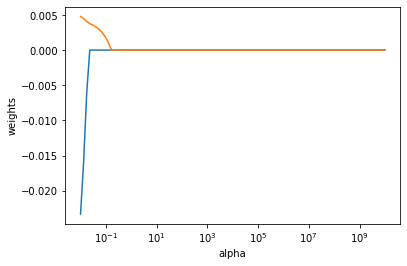

In [113]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
  
import matplotlib.pyplot as plt  
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Tahmin

In [114]:
lasso_model.predict(X_test)

array([0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555

In [115]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5718772025206399

Model Tuning

In [116]:
from sklearn.linear_model import LassoCV

In [117]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [118]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [119]:
lasso_cv_model.alpha_

0.000650851589356676

In [120]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [121]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.000650851589356676)

In [122]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5721407873252984

### 1.7. ElasticNet (eNet) Regresyonu

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [124]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([-0.,  0.])

In [125]:
enet_model.intercept_

0.15555555555555556

Tahmin

In [126]:
enet_model

ElasticNet()

In [127]:
enet_model.predict(X_test)

array([0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555556,
       0.15555556, 0.15555556, 0.15555556, 0.15555556, 0.15555

In [128]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5718772025206399

In [129]:
r2_score(y_test, y_pred)

-4.182770332317176e-06

Model Tuning

In [130]:
from sklearn.linear_model import ElasticNetCV

In [131]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)
enet_cv_model.alpha_

0.1658739441195581

In [132]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [133]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5718772025206399

## 2. Doğrusal Olmayan Regresyon

### 2.1. K En Yakın Komşu (KNN)

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [136]:
knn_model

KNeighborsRegressor()

In [137]:
knn_model.n_neighbors #default değeri 5

5

In [138]:
knn_model.effective_metric_

'euclidean'

Tahmin

In [139]:
y_pred = knn_model.predict(X_test)
print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))
RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


test hatası: 0.6075547769687469
k = 1 için RMSE değeri:  0.7983901931917722
k = 2 için RMSE değeri:  0.7336920972501009
k = 3 için RMSE değeri:  0.6512845307244858
k = 4 için RMSE değeri:  0.6284553606668314
k = 5 için RMSE değeri:  0.6129594588923595
k = 6 için RMSE değeri:  0.6107388552546325
k = 7 için RMSE değeri:  0.6107600245712499
k = 8 için RMSE değeri:  0.5997380032269256
k = 9 için RMSE değeri:  0.5974460118359617
k = 10 için RMSE değeri:  0.5968631451472671


Model Tuning

In [140]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [141]:
knn_cv_model.best_params_["n_neighbors"]

22

In [142]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.7983901931917722 RMSE_CV değeri:  0.8475199193410681
k = 2 için RMSE değeri:  0.7336920972501009 RMSE_CV değeri:  0.7914276524977927
k = 3 için RMSE değeri:  0.6512845307244858 RMSE_CV değeri:  0.6998490706503985
k = 4 için RMSE değeri:  0.6284553606668314 RMSE_CV değeri:  0.6759733570786383
k = 5 için RMSE değeri:  0.6129594588923595 RMSE_CV değeri:  0.6620488035870569
k = 6 için RMSE değeri:  0.6107388552546325 RMSE_CV değeri:  0.6555514335416741
k = 7 için RMSE değeri:  0.6107600245712499 RMSE_CV değeri:  0.6437277235445128
k = 8 için RMSE değeri:  0.5997380032269256 RMSE_CV değeri:  0.6426711820908214
k = 9 için RMSE değeri:  0.5974460118359617 RMSE_CV değeri:  0.6359341058039951
k = 10 için RMSE değeri:  0.5968631451472671 RMSE_CV değeri:  0.6272191246839951


In [143]:
#k=2 için train degil test setini denediğimizde
knn_tuned = KNeighborsRegressor(n_neighbors =2)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.746923514720286

In [144]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=22)

In [145]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.5831474050716141

### 2.2. Destek Vektör Regresyonu (SVR)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 184 to 270986
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    1140 non-null   object  
 1   Sex     1140 non-null   int32   
 2   Age     1140 non-null   float64 
 3   Team    1140 non-null   category
 4   Sport   1140 non-null   category
 5   Medal   1140 non-null   int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 86.4+ KB


In [147]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,1,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()
svr_model = LinearSVR().fit(X_train, y_train)
svr_model.predict(X_train)[0:5]

array([-0.00063068, -0.00126136, -0.00504544,  0.00063068,  0.00063068])

In [148]:
#dogrusal modelimizin parametre katsayilari
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0])) 

y = -0.01576699633611294 + 0.0006306798534445922 x


In [149]:
X_train["Age"][0:1]

18824    24.0
Name: Age, dtype: float64

In [150]:
-0.01689846813506206 + 0.0007681121879573325*24

0.0015362243759139207

In [151]:
y_pred = svr_model.predict(X_train)

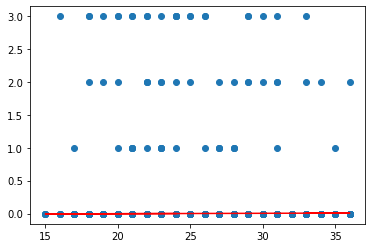

In [152]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [153]:
#lineer regresyon modeliyle svm modelini karsilastiralim
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = 0.0502524365998569 + 0.00436698679279829 x


In [154]:
#lineer regresyon ile elde ettigimiz parametre katsayilari
0.13046685554343962 + 0.007103314368463613*24

0.30094640038656634

Text(0, 0.5, 'Madalya')

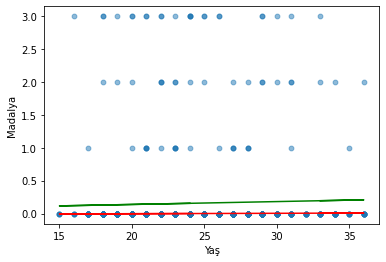

In [155]:
#iki yontemi de gorsel olarak karsilastiralim
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Yaş")
plt.ylabel("Madalya")

Not: Yukarıdaki grafik gözlemlendiğinde,

lineer regresyon yöntemiyle elde edilen doğru (yeşil) yaş değerine göre daha fazla madalya verme eğilimindedir. Bunun sebebi grafiğin üstünde ki kazanılan madalya sayılarıdır.

SVR'de ise (robust bir yontem oldugundan) aykırı gözlemlerin etkisi daha düşüktür.

 Tahmin (Doğrusal SVR)

In [156]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0])) 

y = -0.01576699633611294 + 0.0006306798534445922 x


In [157]:
svr_model.predict([[24]])

array([-0.00063068])

In [158]:
y_pred = svr_model.predict(X_test)

In [159]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5925492868341613

 Model Tuning (Doğrusal SVR)

In [160]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [161]:
pd.Series(svr_cv_model.best_params_)[0]

1.8000000000000003

In [162]:
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [163]:
y_pred = svr_tuned.predict(X_test)

In [164]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5928110351007945

In [165]:
svr_model.intercept_

array([-0.015767])

In [166]:
svr_model.coef_

array([0.00063068])

Tahmin (Doğrusal Olmayan SVR)

In [167]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5744562646538028

Model Tuning (Doğrusal Olmayan SVR)

In [168]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50, 60, 70,
                               80, 90, 100, 110, 120, 130, 140, 200, 300, 400,
                               500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, ...]})

In [169]:
svr_cv_model.best_params_

{'C': 5000}

In [170]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [171]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.5744562646539676

### 2.3. Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)


In [172]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [173]:
#değişken standartlaştırması
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


Tahmin

In [175]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5887756592692256

Model Tuning

In [176]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [177]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [178]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [179]:
mlp_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.005,
 'hidden_layer_sizes': (100, 50, 150)}

In [180]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                         alpha = mlp_cv_model.best_params_['alpha'], 
                         hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(activation='logistic', alpha=0.005,
             hidden_layer_sizes=(100, 50, 150))
logistic


In [181]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='logistic', alpha=0.005,
             hidden_layer_sizes=(100, 50, 150))

In [182]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.571896545208427

### 2.4. Karar Ağaçları / Classification and Regression Trees (CART)


In [183]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,1,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [184]:
#tek bir bagimsiz degiskenle deneyelim
X_train = pd.DataFrame(X_train["Age"])
X_test = pd.DataFrame(X_test["Age"])

In [185]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

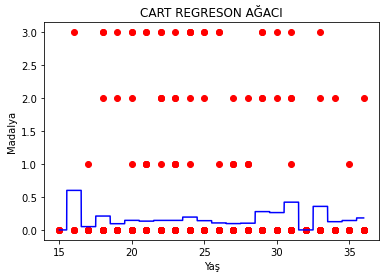

In [186]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Yaş') 
plt.ylabel('Madalya') ;

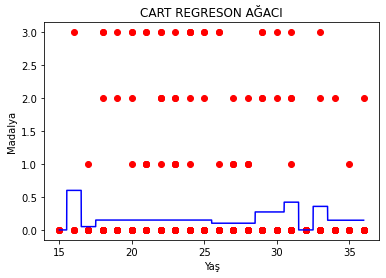

In [187]:
#farklı parametrelerle deneyelim
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)
cart_model.fit(X_train, y_train)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI') 
plt.xlabel('Yaş') 
plt.ylabel('Madalya') ;

In [188]:
#skompiler kutuphanesi ile karar agacinin karar modelini python koduna ceviriyoruz
print(skompile(cart_model.predict).to('python/code'))

(((0.0 if x[0] <= 15.5 else 0.6) if x[0] <= 16.5 else (0.05 if x[0] <= 17.5
     else 0.14962121212121213) if x[0] <= 25.5 else 0.10179640718562874) if
    x[0] <= 28.5 else (0.2727272727272727 if x[0] <= 30.5 else 
    0.42105263157894735) if x[0] <= 31.5 else 0.0 if x[0] <= 32.5 else 
    0.35714285714285715 if x[0] <= 33.5 else 0.14705882352941177)



Tahmin

In [189]:
x = [21]

In [190]:
(((0.0 if x[0] <= 15.5 else 0.6) if x[0] <= 16.5 else (0.05 if x[0] <= 17.5
     else 0.14962121212121213) if x[0] <= 25.5 else 0.10179640718562874) if
    x[0] <= 28.5 else (0.2727272727272727 if x[0] <= 30.5 else 
    0.42105263157894735) if x[0] <= 31.5 else 0.0 if x[0] <= 32.5 else 
    0.35714285714285715 if x[0] <= 33.5 else 0.14705882352941177)

0.14962121212121213

In [191]:
X_test[0:5]

,Age
190933,29.0
216764,21.0
65480,26.0
250669,22.0
74368,31.0


In [192]:
cart_model.predict(X_test)[0:5]

array([0.27272727, 0.14962121, 0.10179641, 0.14962121, 0.42105263])

In [193]:
cart_model.predict([[21]])

array([0.14962121])

In [194]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5802768696517459

Model Tuning

In [195]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [196]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5809255873148585

In [197]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [198]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [199]:
cart_cv_model.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

In [200]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [201]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [202]:
y_pred = cart_tuned.predict(X_test)

In [203]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5801852401414995

In [204]:
#tum bagimsiz degiskenlerle tekrar deneyelim
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()


In [205]:
#ilkel test hatasina bir bakalim
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6059921842438727


In [206]:
#cross validation
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
print(cart_cv_model.best_params_)
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = cart_cv_model.best_params_['max_leaf_nodes'], 
                                   min_samples_split = cart_cv_model.best_params_['min_samples_split'])
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

{'max_leaf_nodes': 2, 'min_samples_split': 2}
0.5745832980370568


### 2.5. Bagged Trees Regresyon

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 184 to 270986
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    1140 non-null   object  
 1   Sex     1140 non-null   int32   
 2   Age     1140 non-null   float64 
 3   Team    1140 non-null   category
 4   Sport   1140 non-null   category
 5   Medal   1140 non-null   int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 86.4+ KB


In [208]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [209]:
#bootstrap_features default degeri false, bootstrap orneklerini gozlemlemek icin true verdik
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [210]:
#tahminci sayisi
bag_model.n_estimators

10

In [211]:
#10 adet agac
bag_model.estimators_

[DecisionTreeRegressor(random_state=866445144),
 DecisionTreeRegressor(random_state=621406217),
 DecisionTreeRegressor(random_state=822572176),
 DecisionTreeRegressor(random_state=559580077),
 DecisionTreeRegressor(random_state=55799716),
 DecisionTreeRegressor(random_state=2006030043),
 DecisionTreeRegressor(random_state=1407121657),
 DecisionTreeRegressor(random_state=1779048679),
 DecisionTreeRegressor(random_state=494911235),
 DecisionTreeRegressor(random_state=2032985414)]

In [212]:
#her bir agacin ornekleri
bag_model.estimators_samples_

[array([254, 816, 387, 254,  55, 638, 765, 309, 832, 166, 304,  79, 534,
        655, 116, 816, 370, 477,  79, 570, 101,  47, 425,  95, 321, 804,
         89, 367, 408, 716, 503, 813, 585, 174, 313, 684, 313, 257, 360,
        493, 610, 390, 594, 420, 607, 700, 314, 354, 221, 590, 140, 123,
        657, 277, 434, 255, 604,  26,  54, 512, 462, 203, 689, 593, 465,
        765, 212, 462, 166, 549, 382, 204, 628, 253, 793, 830, 504, 258,
        285, 249, 672, 674,  95, 775, 539, 531, 436, 661, 101, 128, 379,
        820, 825, 272, 683,  51, 371, 277, 525, 320,  85, 799, 605, 421,
        854, 799, 440, 757, 631, 361, 176, 408, 376, 322, 269, 574, 717,
         58, 114, 194, 265, 571, 844, 269, 154, 788, 325,  63, 365, 686,
        697, 225, 586, 235,  78, 614, 217, 609, 824, 150, 136,  26, 715,
        656, 406, 292, 814, 403, 677, 645,  74,  72,  54, 304,  86,  63,
         61, 454, 601, 389, 379, 143, 560, 357, 240, 102,  42, 446, 829,
        551, 749,  43, 615, 413, 736, 413, 622, 103

In [213]:
#her agacin bagimsiz degiskenleri
bag_model.estimators_features_

[array([0, 0]),
 array([1, 0]),
 array([0, 0]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1])]

Tahmin

In [214]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.587400953592531

In [215]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [216]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

0.6059921842438727

In [217]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [218]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

0.6059921842438727

Model Tuning

In [219]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [220]:
bag_params = {"n_estimators": range(2,20)}

In [221]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [222]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [223]:
bag_cv_model.best_params_

{'n_estimators': 17}

In [224]:
bag_tuned = BaggingRegressor( n_estimators = 6, random_state = 45)

In [225]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=6, random_state=45)

In [226]:
y_pred = bag_tuned.predict(X_test)

In [227]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6086393004132881

### 2.6. Random Forests

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 184 to 270986
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    1140 non-null   object  
 1   Sex     1140 non-null   int32   
 2   Age     1140 non-null   float64 
 3   Team    1140 non-null   category
 4   Sport   1140 non-null   category
 5   Medal   1140 non-null   int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 86.4+ KB


In [229]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [230]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Tahmin

In [231]:
rf_model.predict(X_test)[0:5]

array([0.57603956, 0.04556128, 0.13229926, 0.20085976, 0.22554817])

In [232]:
y_pred = rf_model.predict(X_test)

In [233]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5935149253300821

Model Tuning

In [234]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [0,0.1,0.2],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
# n_jobs = -1 yukarida yapılacak hesap sayisi her bir degerin kombinasyonu dusunuldugunde cok fazla olmaktadır.
#n_jobs parametresi islemcinin paralel yurutebilecegi islemleri ayni anda yurutmesini saglamaktadır.

In [235]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

{'max_depth': 1, 'max_features': 0.1, 'n_estimators': 1000}

In [236]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 0.1, 
                                 n_estimators =200)

In [237]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=0.1, n_estimators=200)

In [238]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.593441298705919

In [239]:
#degiskenlerin onem duzeyine bir bakalim.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

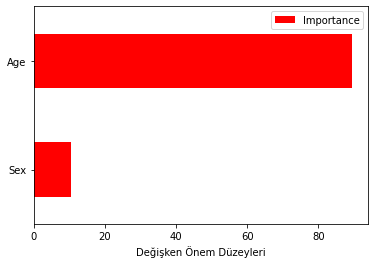

In [240]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### 2.7. Gradient Boosting Machines (GBM)

In [241]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [242]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

Tahmin

In [243]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.606023000533284

Model Tuning

In [244]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [245]:
#algoritmanın calisma zamanina da bir bakalim
t1 =  datetime.now()
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0:05:05.213348


In [246]:
gbm_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

In [247]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.001,  
                                      max_depth = 3, 
                                      n_estimators = 200, 
                                      subsample = 1)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [248]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.574189083606494

In [249]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

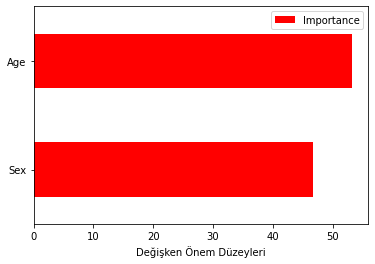

In [250]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### 2.8. XGBoost (eXtreme Gradient Boosting)

In [251]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [252]:
#pandas ya da numpy yerine kendi dataframeini kullanırsaniz daha performanslı calıstigi soylenmis.
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [253]:
#pandas dataframei ile de kullanılabilir.
xgb_model = XGBRegressor().fit(X_train, y_train)

Tahmin

In [254]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6059101967911826

Model Tuning

In [255]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [256]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [257]:
t1 =  datetime.now()

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
0:01:04.186472


In [258]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

In [259]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.01, 
                         max_depth = 2, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [260]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5755507616469157

### 2.9. Light GBM

In [261]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [262]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

Tahmin

In [263]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [264]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5891622785221702

Model Tuning

In [265]:
lgbm_model

LGBMRegressor()

In [266]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [267]:
t1 =  datetime.now()
lgbm_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
0:01:39.167086


In [268]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 40}

In [269]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 2, 
                           n_estimators = 40,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [270]:
y_pred = lgbm_tuned.predict(X_test)

In [271]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5748628285937036

### 2.10. CatBoost


In [272]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(df.columns[[0,3,4,5]], axis = 1)
y = df["Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()

In [273]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.039942
0:	learn: 0.5881751	total: 138ms	remaining: 2m 18s
1:	learn: 0.5878784	total: 139ms	remaining: 1m 9s
2:	learn: 0.5875522	total: 140ms	remaining: 46.6s
3:	learn: 0.5871790	total: 141ms	remaining: 35s
4:	learn: 0.5868254	total: 141ms	remaining: 28.1s
5:	learn: 0.5863386	total: 142ms	remaining: 23.5s
6:	learn: 0.5860876	total: 143ms	remaining: 20.2s
7:	learn: 0.5859275	total: 143ms	remaining: 17.8s
8:	learn: 0.5856402	total: 144ms	remaining: 15.8s
9:	learn: 0.5854498	total: 144ms	remaining: 14.3s
10:	learn: 0.5850881	total: 145ms	remaining: 13s
11:	learn: 0.5847215	total: 146ms	remaining: 12s
12:	learn: 0.5843975	total: 146ms	remaining: 11.1s
13:	learn: 0.5843256	total: 147ms	remaining: 10.3s
14:	learn: 0.5841311	total: 147ms	remaining: 9.67s
15:	learn: 0.5839304	total: 148ms	remaining: 9.09s
16:	learn: 0.5837463	total: 148ms	remaining: 8.58s
17:	learn: 0.5836793	total: 149ms	remaining: 8.12s
18:	learn: 0.5835093	total: 149ms	remaining: 7.71s
19:	learn: 0.583

221:	learn: 0.5733241	total: 280ms	remaining: 982ms
222:	learn: 0.5732366	total: 281ms	remaining: 979ms
223:	learn: 0.5731733	total: 282ms	remaining: 976ms
224:	learn: 0.5730920	total: 282ms	remaining: 973ms
225:	learn: 0.5730645	total: 283ms	remaining: 970ms
226:	learn: 0.5729915	total: 284ms	remaining: 967ms
227:	learn: 0.5729138	total: 285ms	remaining: 964ms
228:	learn: 0.5729125	total: 285ms	remaining: 960ms
229:	learn: 0.5728422	total: 286ms	remaining: 957ms
230:	learn: 0.5727806	total: 287ms	remaining: 954ms
231:	learn: 0.5727180	total: 287ms	remaining: 951ms
232:	learn: 0.5726631	total: 288ms	remaining: 948ms
233:	learn: 0.5726576	total: 289ms	remaining: 945ms
234:	learn: 0.5726092	total: 289ms	remaining: 942ms
235:	learn: 0.5725583	total: 290ms	remaining: 939ms
236:	learn: 0.5724893	total: 291ms	remaining: 937ms
237:	learn: 0.5724430	total: 292ms	remaining: 934ms
238:	learn: 0.5723770	total: 292ms	remaining: 931ms
239:	learn: 0.5723051	total: 293ms	remaining: 928ms
240:	learn: 

420:	learn: 0.5687726	total: 433ms	remaining: 595ms
421:	learn: 0.5687599	total: 434ms	remaining: 594ms
422:	learn: 0.5687567	total: 434ms	remaining: 592ms
423:	learn: 0.5687497	total: 435ms	remaining: 591ms
424:	learn: 0.5687459	total: 436ms	remaining: 590ms
425:	learn: 0.5687328	total: 437ms	remaining: 588ms
426:	learn: 0.5687327	total: 437ms	remaining: 587ms
427:	learn: 0.5687265	total: 438ms	remaining: 585ms
428:	learn: 0.5687233	total: 439ms	remaining: 584ms
429:	learn: 0.5687167	total: 439ms	remaining: 582ms
430:	learn: 0.5687104	total: 440ms	remaining: 581ms
431:	learn: 0.5686990	total: 441ms	remaining: 580ms
432:	learn: 0.5686928	total: 442ms	remaining: 578ms
433:	learn: 0.5686896	total: 442ms	remaining: 577ms
434:	learn: 0.5686825	total: 443ms	remaining: 576ms
435:	learn: 0.5686727	total: 444ms	remaining: 574ms
436:	learn: 0.5686644	total: 445ms	remaining: 573ms
437:	learn: 0.5686575	total: 446ms	remaining: 572ms
438:	learn: 0.5686514	total: 447ms	remaining: 571ms
439:	learn: 

622:	learn: 0.5680908	total: 586ms	remaining: 354ms
623:	learn: 0.5680900	total: 586ms	remaining: 353ms
624:	learn: 0.5680895	total: 587ms	remaining: 352ms
625:	learn: 0.5680890	total: 588ms	remaining: 351ms
626:	learn: 0.5680885	total: 589ms	remaining: 350ms
627:	learn: 0.5680881	total: 589ms	remaining: 349ms
628:	learn: 0.5680874	total: 590ms	remaining: 348ms
629:	learn: 0.5680862	total: 591ms	remaining: 347ms
630:	learn: 0.5680854	total: 592ms	remaining: 346ms
631:	learn: 0.5680843	total: 593ms	remaining: 345ms
632:	learn: 0.5680838	total: 593ms	remaining: 344ms
633:	learn: 0.5680832	total: 594ms	remaining: 343ms
634:	learn: 0.5680825	total: 595ms	remaining: 342ms
635:	learn: 0.5680820	total: 596ms	remaining: 341ms
636:	learn: 0.5680805	total: 596ms	remaining: 340ms
637:	learn: 0.5680798	total: 597ms	remaining: 339ms
638:	learn: 0.5680793	total: 598ms	remaining: 338ms
639:	learn: 0.5680786	total: 599ms	remaining: 337ms
640:	learn: 0.5680778	total: 600ms	remaining: 336ms
641:	learn: 

821:	learn: 0.5680178	total: 739ms	remaining: 160ms
822:	learn: 0.5680177	total: 740ms	remaining: 159ms
823:	learn: 0.5680175	total: 741ms	remaining: 158ms
824:	learn: 0.5680173	total: 741ms	remaining: 157ms
825:	learn: 0.5680173	total: 742ms	remaining: 156ms
826:	learn: 0.5680172	total: 743ms	remaining: 155ms
827:	learn: 0.5680170	total: 744ms	remaining: 155ms
828:	learn: 0.5680170	total: 745ms	remaining: 154ms
829:	learn: 0.5680169	total: 746ms	remaining: 153ms
830:	learn: 0.5680168	total: 746ms	remaining: 152ms
831:	learn: 0.5680167	total: 747ms	remaining: 151ms
832:	learn: 0.5680165	total: 748ms	remaining: 150ms
833:	learn: 0.5680163	total: 749ms	remaining: 149ms
834:	learn: 0.5680161	total: 749ms	remaining: 148ms
835:	learn: 0.5680161	total: 750ms	remaining: 147ms
836:	learn: 0.5680159	total: 751ms	remaining: 146ms
837:	learn: 0.5680158	total: 752ms	remaining: 145ms
838:	learn: 0.5680157	total: 752ms	remaining: 144ms
839:	learn: 0.5680155	total: 753ms	remaining: 143ms
840:	learn: 

Tahmin

In [274]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6055533257518269

Model Tuning

In [275]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [276]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [277]:
t1 =  datetime.now()
catb_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 0.5885636	total: 537us	remaining: 107ms
1:	learn: 0.5884834	total: 1.19ms	remaining: 118ms
2:	learn: 0.5883549	total: 1.65ms	remaining: 108ms
3:	learn: 0.5882915	total: 2.15ms	remaining: 105ms
4:	learn: 0.5881789	total: 2.65ms	remaining: 104ms
5:	learn: 0.5880400	total: 3.16ms	remaining: 102ms
6:	learn: 0.5879678	total: 3.68ms	remaining: 101ms
7:	learn: 0.5878683	total: 4.18ms	remaining: 100ms
8:	learn: 0.5877961	total: 4.71ms	remaining: 100ms
9:	learn: 0.5876995	total: 5.21ms	remaining: 99ms
10:	learn: 0.5876046	total: 5.69ms	remaining: 97.8ms
11:	learn: 0.5875370	total: 6.15ms	remaining: 96.4ms
12:	learn: 0.5874669	total: 6.67ms	remaining: 95.9ms
13:	learn: 0.5873401	total: 7.16ms	remaining: 95.2ms
14:	learn: 0.5872779	total: 7.78ms	remaining: 96ms
15:	learn: 0.5872150	total: 8.28ms	remaining: 95.2ms
16:	learn: 0.5871273	total: 8.73ms	remaining: 93.9ms
17:	learn: 0.5871062	total: 9.19ms	remaining: 92.9ms
18:	lear

In [278]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}

In [279]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 3)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.5885636	total: 517us	remaining: 103ms
1:	learn: 0.5884834	total: 1.6ms	remaining: 158ms
2:	learn: 0.5883549	total: 2.17ms	remaining: 143ms
3:	learn: 0.5882915	total: 2.68ms	remaining: 131ms
4:	learn: 0.5881789	total: 3.22ms	remaining: 126ms
5:	learn: 0.5880400	total: 3.73ms	remaining: 121ms
6:	learn: 0.5879678	total: 4.23ms	remaining: 117ms
7:	learn: 0.5878683	total: 4.83ms	remaining: 116ms
8:	learn: 0.5877961	total: 5.4ms	remaining: 115ms
9:	learn: 0.5876995	total: 5.93ms	remaining: 113ms
10:	learn: 0.5876046	total: 6.46ms	remaining: 111ms
11:	learn: 0.5875370	total: 7ms	remaining: 110ms
12:	learn: 0.5874669	total: 7.64ms	remaining: 110ms
13:	learn: 0.5873401	total: 8.13ms	remaining: 108ms
14:	learn: 0.5872779	total: 8.63ms	remaining: 106ms
15:	learn: 0.5872150	total: 9.16ms	remaining: 105ms
16:	learn: 0.5871273	total: 9.65ms	remaining: 104ms
17:	learn: 0.5871062	total: 10.1ms	remaining: 103ms
18:	learn: 0.5870373	total: 10.6ms	remaining: 101ms
19:	learn: 0.5869503	total: 

In [280]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5793140755630813